# INIT

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.externals import joblib

test_dataset = pd.read_csv("C:/Users/USER/Documents/Kerja/Kuliah/IF 3170 AI/TBSC2/tubes2_HeartDisease_test.csv")
train_dataset = pd.read_csv("C:/Users/USER/Documents/Kerja/Kuliah/IF 3170 AI/TBSC2/tubes2_HeartDisease_train.csv")
test_dataset.rename(columns = {'Column1':'Age',
                               'Column2':'Sex',
                               'Column3':'Chest-Pain Type',
                               'Column4':'Resting Blood Pressure',
                               'Column5':'Serum Cholestrol',
                               'Column6':'Fasting Blood Sugar',
                               'Column7':'Resting ECG',
                               'Column8':'Max Heart Rate Achieved',
                               'Column9':'Exercise Induced Angina',
                               'Column10':'ST Depression Induced',
                               'Column11':'Peak Exercise ST',
                               'Column12':'Number of Major Vessels',
                               'Column13':'Thal',
                              }, inplace = True)
train_dataset.rename(columns = {'Column1':'Age',
                               'Column2':'Sex',
                               'Column3':'Chest-Pain Type',
                               'Column4':'Resting Blood Pressure',
                               'Column5':'Serum Cholestrol',
                               'Column6':'Fasting Blood Sugar',
                               'Column7':'Resting ECG',
                               'Column8':'Max Heart Rate Achieved',
                               'Column9':'Exercise Induced Angina',
                               'Column10':'ST Depression Induced',
                               'Column11':'Peak Exercise ST',
                               'Column12':'Number of Major Vessels',
                               'Column13':'Thal',
                               'Column14':'Diagnose'
                              }, inplace = True)

# Change Category

In [2]:
for col in ['Sex','Chest-Pain Type','Fasting Blood Sugar','Resting ECG','Exercise Induced Angina','Peak Exercise ST','Thal']:
    train_dataset[col] = train_dataset[col].astype('category')
for col in ['Sex','Chest-Pain Type','Fasting Blood Sugar','Resting ECG','Exercise Induced Angina','Peak Exercise ST','Thal']:
    test_dataset[col] = test_dataset[col].astype('category')
    
train_dataset.dtypes

Age                           int64
Sex                        category
Chest-Pain Type            category
Resting Blood Pressure       object
Serum Cholestrol             object
Fasting Blood Sugar        category
Resting ECG                category
Max Heart Rate Achieved      object
Exercise Induced Angina    category
ST Depression Induced        object
Peak Exercise ST           category
Number of Major Vessels      object
Thal                       category
Diagnose                      int64
dtype: object

# FILL EMPTY

In [3]:
train_dataset.replace({'?' : None, 'None' : None}, inplace=True)

train_dataset['Resting Blood Pressure'].fillna(value = train_dataset['Resting Blood Pressure'].median(),inplace=True)
train_dataset['Serum Cholestrol'].fillna(value = train_dataset['Serum Cholestrol'].median(),inplace=True)
train_dataset['Fasting Blood Sugar'].fillna(value = train_dataset['Fasting Blood Sugar'].mode()[0],inplace=True)
train_dataset['Resting ECG'].fillna(value = train_dataset['Resting ECG'].mode()[0],inplace=True)
train_dataset['Max Heart Rate Achieved'].fillna(value = train_dataset['Max Heart Rate Achieved'].median(),inplace=True)
train_dataset['Exercise Induced Angina'].fillna(value = train_dataset['Exercise Induced Angina'].mode()[0],inplace=True)
train_dataset['ST Depression Induced'].fillna(value = train_dataset['ST Depression Induced'].median(),inplace=True)
train_dataset['Peak Exercise ST'].fillna(value = train_dataset['Peak Exercise ST'].mode()[0],inplace=True)
train_dataset['Number of Major Vessels'].fillna(value = train_dataset['Number of Major Vessels'].mode()[0],inplace=True)
train_dataset['Thal'].fillna(value = train_dataset['Thal'].mode()[0],inplace=True)


train_dataset

,Age,Sex,Chest-Pain Type,Resting Blood Pressure,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Max Heart Rate Achieved,Exercise Induced Angina,ST Depression Induced,Peak Exercise ST,Number of Major Vessels,Thal,Diagnose
0,54,1,4,125,216,0,0,140,0,0,2,0,3,1
1,55,1,4,158,217,0,0,110,1,2.5,2,0,3,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,2,0,3,0
4,50,1,4,120,0,0,1,156,1,0,1,0,6,3
5,64,0,4,130,303,0,0,122,0,2,2,2,3,0
6,63,1,4,130,308,0,0,138,1,2,2,0,3,2
7,58,1,2,130,251,0,0,110,0,0,2,0,3,0
8,42,1,2,150,268,0,0,136,0,0,2,0,3,0
9,54,1,3,120,258,0,2,147,0,4,2,0,7,0


# SPLIT DATA

In [4]:
train_data = train_dataset.iloc[:, :-1].values  
train_label = train_dataset.iloc[:, 13].values

In [5]:
kf = KFold(n_splits=10)

def Average(lst): 
    return sum(lst) / len(lst) 
clf = MLPClassifier(hidden_layer_sizes=(9),solver='adam',activation = 'tanh',momentum = 0.7,max_iter = 1000,random_state=15
                       )
accuracy_values = []
for train_indices, test_indices in kf.split(train_data):
    clf.fit(train_data[train_indices], train_label[train_indices])
    print(clf.score(train_data[test_indices], train_label[test_indices]))
    accuracy_values.append(clf.score(train_data[test_indices], train_label[test_indices]))
print("ACC")
print("Avg Accuracy " + str(Average(accuracy_values)) + '%')    
predicted = cross_val_predict(clf, train_data,train_label, cv=20)
#print(predicted)
print(classification_report(train_label,predicted))

0.5769230769230769
0.5769230769230769
0.6410256410256411
0.5897435897435898
0.6282051282051282
0.47435897435897434
0.5769230769230769
0.5512820512820513
0.5256410256410257
0.6103896103896104
ACC
Avg Accuracy 0.5751415251415251%
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       349
           1       0.42      0.62      0.50       225
           2       0.11      0.01      0.02        92
           3       0.34      0.13      0.19        90
           4       0.00      0.00      0.00        23

   micro avg       0.58      0.58      0.58       779
   macro avg       0.32      0.33      0.30       779
weighted avg       0.51      0.58      0.53       779



C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# PLOT LEARNING CURVE

A
B


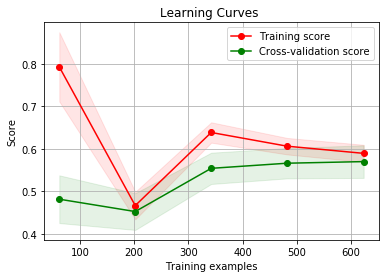

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    print("A")
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print("B")
    return plt


digits = load_digits()
X, y = digits.data, digits.target

title = "Learning Curves "
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=26)
estimator = MLPClassifier(hidden_layer_sizes=(9),solver='adam',activation = 'tanh', momentum = 0.7,max_iter = 1000,random_state=15
                         )
plot_learning_curve(estimator, title, train_data, train_label, ylim=None, cv=cv, n_jobs=4)


plt.show()

# FILL TEST

In [7]:
test_dataset.replace({'?' : None, 'None' : None}, inplace=True)

test_dataset['Resting Blood Pressure'].fillna(value = test_dataset['Resting Blood Pressure'].median(),inplace=True)
test_dataset['Serum Cholestrol'].fillna(value = test_dataset['Serum Cholestrol'].median(),inplace=True)
test_dataset['Fasting Blood Sugar'].fillna(value = test_dataset['Fasting Blood Sugar'].mode()[0],inplace=True)
test_dataset['Resting ECG'].fillna(value = test_dataset['Resting ECG'].mode()[0],inplace=True)
test_dataset['Max Heart Rate Achieved'].fillna(value = test_dataset['Max Heart Rate Achieved'].median(),inplace=True)
test_dataset['Exercise Induced Angina'].fillna(value = test_dataset['Exercise Induced Angina'].mode()[0],inplace=True)
test_dataset['ST Depression Induced'].fillna(value = test_dataset['ST Depression Induced'].median(),inplace=True)
test_dataset['Peak Exercise ST'].fillna(value = test_dataset['Peak Exercise ST'].mode()[0],inplace=True)
test_dataset['Number of Major Vessels'].fillna(value = test_dataset['Number of Major Vessels'].mode()[0],inplace=True)
test_dataset['Thal'].fillna(value = test_dataset['Thal'].mode()[0],inplace=True)


# SPLIT

In [8]:
def Average(lst): 
    return sum(lst) / len(lst) 

#accuracy_values = []
#predict_values = []
#recall_values = []
for i in range(0, 300):
    print(i)
    training_data, testing_data, training_label, testing_label = train_test_split(train_data, train_label, test_size = 0.2, random_state=i)
    MLP_classifier = MLPClassifier(
                                   hidden_layer_sizes=(9),solver='adam',activation = 'tanh',momentum = 0.7,max_iter = 1000,random_state=15).fit(training_data, training_label)
    MLP_prediction = MLP_classifier.predict(testing_data)
    accuracy = accuracy_score(testing_label, MLP_prediction)*100
    precision = precision_score(testing_label, MLP_prediction,average='macro')*100
    recall = recall_score(testing_label, MLP_prediction,average='macro')*100
    #print(MLP_prediction)
    #print(testing_label)
    #print(classification_report(testing_label,MLP_prediction))
    accuracy_values.append(accuracy)
    #precision_values.append(precision)
    #recall_values.append(recall)
    print("Accuracy = " + str(accuracy))
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))

#print("Avg Accuracy = " + str(Average(accuracy_values)))
#print("Avg Precision = " + str(Average(predict_values)))
#print("Avg Recall = " + str(Average(recall_values)))
    

0


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 33.313663505444325
Recall = 30.465587044534416
1


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 30.113538195729976
Recall = 32.57647058823529
2


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 33.25548226065253
Recall = 33.78387420541987
3


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 28.951103541267475
Recall = 31.913432835820892
4


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 26.245505906522858
Recall = 29.2007992007992
5


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.641025641025635
Precision = 25.466047195317216
Recall = 31.145465611685943
6


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.717948717948715
Precision = 27.30352303523035
Recall = 27.544499723604197
7


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 30.852947231180956
Recall = 36.47440794499618
8


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 27.450980392156865
Recall = 30.22144522144522
9


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 30.4
Recall = 32.6894381566259
10


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 30.78119349005425
Recall = 28.81208289427467
11


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 22.30287859824781
Recall = 26.857142857142858
12


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.28205128205128
Precision = 28.017889087656535
Recall = 28.44750021220609
13


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 32.107142857142854
Recall = 31.3010989010989
14


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 31.08314028314029
Recall = 31.292857142857144
15


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 62.82051282051282
Precision = 34.345238095238095
Recall = 35.27536231884058
16


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 29.803030303030305
Recall = 32.003549245785265
17


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 23.35164835164835
Recall = 27.919767930073668
18


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 29.97911445279866
Recall = 32.85319255907492
19


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 23.403880070546737
Recall = 29.081871345029235
20


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 61.53846153846154
Precision = 36.042617960426185
Recall = 36.883116883116884
21


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 22.808580858085808
Recall = 26.77551020408163
22


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 42.600960683152465
Recall = 29.948735475051265
23


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 34.013666606725415
Recall = 33.639280758556886
24


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 34.82457661406855
Recall = 29.844528072376175
25


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.28205128205128
Precision = 26.966089466089464
Recall = 28.862745098039216
26


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 25.492957746478872
Recall = 30.81306206693204
27


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 29.817148505065482
Recall = 32.44307853756348
28
Accuracy = 47.43589743589743
Precision = 25.137135733208666
Recall = 25.89090909090909
29


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 37.87477954144621
Recall = 32.59380259380259
30


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 28.84651411748963
Recall = 31.873606244026764
31


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 24.98699368264586
Recall = 31.81096681096681
32


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 31.872269606823377
Recall = 34.451713699834
33
Accuracy = 47.43589743589743
Precision = 24.125109361329834
Recall = 25.458937198067634
34


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 28.253081823446678
Recall = 31.363636363636367
35


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 40.85304224782696
Recall = 28.362091503267973
36


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 28.73968079251513
Recall = 30.861917918997232
37


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 32.75104206138689
Recall = 30.89577089577089
38


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 32.23809523809524
Recall = 35.233805233805235
39


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 23.52729885057471
Recall = 29.220779220779225
40


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 30.324500061342167
Recall = 33.672812408545504
41


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 28.548589341692786
Recall = 31.236363636363635
42


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 63.46153846153846
Precision = 34.98229140927436
Recall = 35.63982349696636
43


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 24.016563146997928
Recall = 31.28205128205128
44


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 21.540069686411147
Recall = 29.203761755485893
45


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 62.82051282051282
Precision = 35.751557526457546
Recall = 34.76190476190476
46


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 25.076923076923073
Recall = 28.80293757649938
47


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 37.424763315174275
Recall = 31.08266721322675
48


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 33.6472088526883
Recall = 34.91477272727273
49


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 62.82051282051282
Precision = 34.260402598237825
Recall = 36.4261252446184
50


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 22.919540229885058
Recall = 29.05831571529246
51


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 34.66666666666667
Recall = 34.14492753623188
52


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.28205128205128
Precision = 21.285948094458735
Recall = 25.317953268263828
53


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 31.458058849363198
Recall = 33.82439782439782
54


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.641025641025635
Precision = 28.224806201550383
Recall = 28.762626262626263
55


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 22.50475827940617
Recall = 29.551414768806072
56


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 30.413091488360305
Recall = 30.561654902064657
57


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 28.095238095238095
Recall = 30.85425685425685
58


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 22.258064516129032
Recall = 27.8125
59


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 18.48520249221184
Recall = 26.16053511705686
60


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 27.698595440939442
Recall = 30.78181818181818
61


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 42.320417287630406
Recall = 30.81577776391574
62


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.641025641025635
Precision = 20.63907044299201
Recall = 27.854166666666664
63


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 44.38192668371697
Recall = 34.792325254654024
64


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 61.53846153846154
Precision = 28.535353535353536
Recall = 32.9432222920595
65


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 34.4026161293645
Recall = 33.33129926264938
66


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 49.358974358974365
Precision = 24.91967491967492
Recall = 28.95609318996416
67


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 63.46153846153846
Precision = 35.079365079365076
Recall = 36.58468515611373
68


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 29.130312412046155
Recall = 31.597752144335995
69


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 32.94852135815991
Recall = 37.20917021708258
70


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 27.644444444444442
Recall = 32.62977262977263
71


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 42.728144989339015
Recall = 34.48499075259638
72


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 22.41025641025641
Recall = 28.6878666255017
73


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 31.66518122400476
Recall = 37.43084733893557
74


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 28.33808505583274
Recall = 29.9009009009009
75


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 32.14461214461215
Recall = 29.889416334016616
76


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 30.399046736396134
Recall = 31.888975929354796
77


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 31.623727150042942
Recall = 33.823439878234396
78


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 26.186868686868685
Recall = 31.80555555555556
79


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 26.561771561771565
Recall = 31.138286893704848
80


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 32.39538239538239
Recall = 34.340485276117796
81


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 32.61808367071525
Recall = 32.62254901960785
82


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 39.09136872517154
Recall = 34.59188034188035
83


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 26.567186905215078
Recall = 30.229885057471268
84


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 35.6948051948052
Recall = 34.70943343857336
85


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 62.17948717948718
Precision = 35.993788819875775
Recall = 34.54104718810601
86


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 26.75894281157439
Recall = 28.07612677177895
87


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 32.13617021276596
Recall = 29.742424242424242
88


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 28.457831325301203
Recall = 31.42280253062323
89


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 33.1274078150798
Recall = 32.832858198711854
90


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.641025641025635
Precision = 26.02915951972556
Recall = 29.086538461538463
91


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 30.13386613386613
Recall = 33.37595907928389
92


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 39.16666666666667
Recall = 33.48922073117412
93


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 30.81199799196787
Recall = 34.18552036199095
94


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 24.416326530612245
Recall = 27.6371543264942
95


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 26.472243060765194
Recall = 27.94768230727967
96


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 28.52631578947368
Recall = 27.54603379813464
97


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 23.34821428571429
Recall = 31.726342710997447
98


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 31.03748103748104
Recall = 33.506493506493506
99


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 29.826504245108893
Recall = 31.92805155069306
100


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 25.577464788732396
Recall = 29.389473684210525
101


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 26.851432378414387
Recall = 31.83333333333333
102


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 27.03916294935712
Recall = 29.645780051150894
103


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 21.670955566992625
Recall = 28.53083853083853
104


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 28.852545304158205
Recall = 31.30287859824781
105


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 33.14786585365853
Recall = 35.80378787878788
106
Accuracy = 51.28205128205128
Precision = 26.613058419243984
Recall = 29.977703455964328
107


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 35.19298245614035
Recall = 33.3472114831777
108


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 28.792407670256875
Recall = 30.587175410704827
109


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 30.662218927600694
Recall = 33.7780612244898
110


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 38.06390977443609
Recall = 32.78696984357362
111


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 32.364513018322086
Recall = 33.90526315789474
112


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 24.005553627212773
Recall = 31.2640099626401
113


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 37.066666666666656
Recall = 34.3015543015543
114


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 34.567901234567906
Recall = 33.474164133738604
115


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 33.01879555044112
Recall = 35.98090798090798
116


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 29.542582966813274
Recall = 32.40322451911565
117


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 33.16378066378066
Recall = 32.734487734487736
118


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 29.655462184873947
Recall = 31.37254901960785
119


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 61.53846153846154
Precision = 28.61760913612083
Recall = 30.53488491662239
120


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 21.001883239171377
Recall = 25.299145299145298
121


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 64.1025641025641
Precision = 32.153422155542145
Recall = 35.622159795092124
122


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 33.41888549396188
Recall = 36.73590998368787
123


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 45.51282051282051
Precision = 25.18754688672168
Recall = 27.251633986928102
124


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 30.41561181434599
Recall = 33.07579318448884
125


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 35.76867030965391
Recall = 32.41800152555302
126


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 23.538484576220426
Recall = 27.849765258215964
127


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 29.73684210526316
Recall = 32.476287262872624
128


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 64.74358974358975
Precision = 35.31694468832309
Recall = 34.21128909229596
129


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 34.058514628657164
Recall = 31.329773709636417
130


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 32.142688214426485
Recall = 34.24444444444445
131


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 25.995721749146405
Recall = 29.12790697674419
132


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 31.235653461680858
Recall = 32.08475885663834
133


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 65.38461538461539
Precision = 46.08454608454608
Recall = 35.71887550200803
134


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 24.005439005439005
Recall = 25.804318488529017
135


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 26.83385579937304
Recall = 30.024368780884043
136


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 61.53846153846154
Precision = 31.631746031746033
Recall = 34.358108108108105
137


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 27.97528730113
Recall = 33.049019607843135
138


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 27.198909020066235
Recall = 32.30769230769231
139


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 37.54634406689201
Recall = 32.27972528724409
140


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 64.1025641025641
Precision = 30.93119338948037
Recall = 33.25925925925927
141


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 24.954887218045112
Recall = 31.21256038647343
142
Accuracy = 51.28205128205128
Precision = 28.865384615384613
Recall = 26.502453274341303
143


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 61.53846153846154
Precision = 32.254757866968156
Recall = 31.78058783321941
144


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 32.03571428571429
Recall = 30.63509838425852
145


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 26.44322344322344
Recall = 30.01120448179272
146


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 28.179012345679013
Recall = 29.596828609986503
147


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 49.358974358974365
Precision = 24.957731407169607
Recall = 27.39219844483002
148


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 31.95434823618185
Recall = 37.51785985712114
149


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 35.43265306122449
Recall = 29.095238095238095
150


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 31.130434782608695
Recall = 33.56873315363881
151


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 31.281360737065906
Recall = 32.24844720496895
152


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 31.76623376623377
Recall = 34.691358024691354
153


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.717948717948715
Precision = 33.75973075797483
Recall = 30.18852696179208
154
Accuracy = 44.871794871794876
Precision = 20.38600288600288
Recall = 22.55144855144855
155


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 37.75261324041812
Recall = 32.15384615384616
156


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 24.65962441314554
Recall = 30.392464678178964
157


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 45.0357754985445
Recall = 30.793650793650794
158


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 63.46153846153846
Precision = 32.955033472274856
Recall = 36.63083538083538
159


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 26.248062015503876
Recall = 30.15113541429331
160


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 34.45967589975504
Recall = 35.00199123855038
161


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 28.349206349206348
Recall = 29.51965475185289
162


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 66.66666666666666
Precision = 34.10504201680673
Recall = 38.70606749431719
163


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 66.66666666666666
Precision = 33.16815697963239
Recall = 33.661695447409734
164


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 27.326923076923077
Recall = 31.23443756825628
165


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 27.27777777777778
Recall = 30.024783726911387
166


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 36.935876623376615
Recall = 34.65347351061637
167


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.07692307692308
Precision = 29.31174089068826
Recall = 28.134920634920636
168


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 28.97155049786629
Recall = 32.96087636932707
169


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 28.66522366522366
Recall = 31.80223285486443
170


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.07692307692308
Precision = 23.386243386243386
Recall = 25.291571173924115
171


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 29.119118586331705
Recall = 30.53054424287301
172


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 32.7005772005772
Recall = 34.768115942028984
173


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 31.57366771159874
Recall = 33.0233918128655
174


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 29.646629388008698
Recall = 36.60798122065728
175


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 64.74358974358975
Precision = 32.77228189184097
Recall = 34.711811161045425
176


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 23.431263858093125
Recall = 29.147435897435898
177


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 29.18048645660586
Recall = 31.187280124211398
178


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 27.582491582491585
Recall = 30.277836318932206
179


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 29.757276995305165
Recall = 31.65834165834166
180


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 24.45373467112598
Recall = 28.067226890756302
181


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 31.089939024390244
Recall = 32.99043062200956
182


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 34.312198739340005
Recall = 33.082191780821915
183


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 32.92106586224234
Recall = 34.95339119254259
184


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 63.46153846153846
Precision = 33.70480928689884
Recall = 33.83333333333333
185


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.717948717948715
Precision = 25.62059202059202
Recall = 29.64285714285714
186


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.641025641025635
Precision = 21.38643578643579
Recall = 25.35726495726496
187


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 42.41026530258367
Recall = 33.80952380952381
188


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 30.193141974208114
Recall = 33.50411894715692
189


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 40.8578431372549
Recall = 33.55669661959777
190


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 64.74358974358975
Precision = 31.87878787878788
Recall = 34.808779962294636
191


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 30.130724070450093
Recall = 34.80445795339413
192


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 69.23076923076923
Precision = 36.27855265817667
Recall = 35.94669587440672
193


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 62.17948717948718
Precision = 32.235294117647065
Recall = 35.07191994996873
194


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 28.236990154711673
Recall = 31.878205128205128
195


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 27.227075533368993
Recall = 31.583160800552108
196


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 33.037837837837834
Recall = 33.36996904024768
197


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 28.451236965855653
Recall = 32.28452380952381
198


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 24.43452380952381
Recall = 29.894419306184012
199


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.717948717948715
Precision = 23.130634071810547
Recall = 27.92561362225055
200


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 29.09513742071882
Recall = 30.843325705568265
201


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 33.351916376306626
Recall = 34.32867132867133
202


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 28.14699792960662
Recall = 29.15986672106623
203


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 23.135972461273667
Recall = 31.528169014084504
204


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 29.770737327188932
Recall = 32.89876234181616
205


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 32.90208554259456
Recall = 32.43609022556391
206
Accuracy = 62.17948717948718
Precision = 42.88294314381271
Recall = 35.52830258439014
207


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 28.911834380471724
Recall = 32.51567944250871
208


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 62.17948717948718
Precision = 30.619967793880836
Recall = 32.600794267460934
209


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 33.22061191626409
Recall = 33.904892771261714
210


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 24.245108896271685
Recall = 30.56689342403628
211


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 25.367881031235797
Recall = 29.904761904761905
212


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 23.854875283446713
Recall = 27.479500891265594
213


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 28.73972602739726
Recall = 31.617743999379584
214


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 29.073593073593074
Recall = 32.587535014005596
215


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 62.82051282051282
Precision = 35.54909339719467
Recall = 34.398534798534804
216


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 46.794871794871796
Precision = 24.927536231884055
Recall = 27.480519480519483
217


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 31.98394290811775
Recall = 29.67401500938086
218


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 52.724505327245055
Recall = 35.59650775705044
219


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 33.484848484848484
Recall = 33.991711991711995
220


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 62.82051282051282
Precision = 31.45206994263598
Recall = 31.044188010132277
221


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 25.590858416945377
Recall = 28.145412939463277
222


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 33.487235655910354
Recall = 33.52084930573302
223


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 27.656377803607562
Recall = 33.36545589325426
224


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 28.67186147186147
Recall = 29.52173913043478
225


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.28205128205128
Precision = 28.300075018754683
Recall = 28.549019607843135
226


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 30.382859149982437
Recall = 29.46784922394678
227
Accuracy = 43.58974358974359
Precision = 19.206349206349206
Recall = 23.227596577279723
228


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 32.86416021160022
Recall = 33.42857142857143
229


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.641025641025635
Precision = 27.56226126814362
Recall = 31.65799959478625
230


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 65.38461538461539
Precision = 43.250974547122226
Recall = 37.85504201680672
231


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 27.268528464017184
Recall = 29.803760282021152
232


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 61.53846153846154
Precision = 33.12155541947337
Recall = 36.477272727272734
233


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.333333333333336
Precision = 36.171197223828806
Recall = 32.41957835765885
234


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 31.991596638655462
Recall = 33.61538461538461
235


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 30.93320143207085
Recall = 34.32753383043358
236


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 46.794871794871796
Precision = 35.664935064935065
Recall = 32.54337037436616
237


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 29.349384792422768
Recall = 32.65278838808251
238


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 23.35551159863334
Recall = 28.79566210045662
239


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 23.14450474898236
Recall = 30.742590742590743
240


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 26.134099616858244
Recall = 29.455825864276562
241


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 41.65822357311719
Recall = 35.712852740346854
242


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 64.74358974358975
Precision = 37.32693674484719
Recall = 35.81557997872821
243


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 44.871794871794876
Precision = 24.4359351988218
Recall = 26.0
244


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 31.133919843597262
Recall = 31.58169934640523
245


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 28.148148148148145
Recall = 31.476339234062245
246


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 61.53846153846154
Precision = 30.16010006253909
Recall = 32.7962962962963
247
Accuracy = 53.205128205128204
Precision = 24.235294117647058
Recall = 28.703521542396228
248


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.28205128205128
Precision = 28.490702411459356
Recall = 29.741407528641574
249


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.717948717948715
Precision = 24.321756894790607
Recall = 29.55164694595459
250


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 29.24251805985552
Recall = 31.188085202681677
251


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 35.55285821628807
Recall = 31.73913043478261
252


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.717948717948715
Precision = 23.721229920882287
Recall = 27.95783926218709
253


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.256410256410255
Precision = 32.46973456650876
Recall = 37.27184637068358
254


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 25.594771241830067
Recall = 28.487855297157623
255


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 32.1978021978022
Recall = 35.83957219251337
256


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 49.358974358974365
Precision = 27.809967809967812
Recall = 29.336035123269166
257


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 28.359387590652695
Recall = 33.25
258


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.28205128205128
Precision = 20.41628959276018
Recall = 28.07871198568873
259


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.692307692307686
Precision = 33.95735129068463
Recall = 33.46485260770975
260


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 30.122887864823344
Recall = 30.60590560334806
261


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 27.115602997955936
Recall = 32.62032085561498
262


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 23.588930019390094
Recall = 29.06666666666667
263


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 27.108884841125274
Recall = 31.467509453954218
264


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 27.790476190476195
Recall = 31.51845477146682
265


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 26.504914963332816
Recall = 31.932234432234434
266
Accuracy = 61.53846153846154
Precision = 41.44530605510642
Recall = 44.86111111111111
267


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.07692307692308
Precision = 26.031991744066048
Recall = 30.333333333333336
268


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 48.717948717948715
Precision = 22.520318989018833
Recall = 26.285714285714285
269


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 27.435064935064936
Recall = 31.341836734693878
270


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 38.907103825136616
Recall = 28.26369741958289
271


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.205128205128204
Precision = 21.742993848257004
Recall = 29.852008456659618
272
Accuracy = 58.333333333333336
Precision = 34.086399711399714
Recall = 38.30330553901132
273


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 60.89743589743589
Precision = 34.10379981464319
Recall = 35.81959668646975
274


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 27.506059446357956
Recall = 30.689773213521608
275


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 50.0
Precision = 24.649643349517476
Recall = 29.219913419913425
276


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 22.176470588235293
Recall = 28.623910336239106
277


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 33.13636363636363
Recall = 32.033367733058135
278


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 50.06677284979172
Recall = 36.18943227824807
279


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 44.35858964741185
Recall = 35.48571703890876
280


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 26.506808408982323
Recall = 30.054347826086957
281


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 54.48717948717948
Precision = 29.39520624303233
Recall = 32.641528406234286
282


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 33.16998556998557
Recall = 32.591595267237864
283


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 59.61538461538461
Precision = 34.562183158864975
Recall = 36.767713538736466
284


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 36.59971811134602
Recall = 31.384277558190597
285


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 53.84615384615385
Precision = 30.835945663531874
Recall = 30.05403579871665
286


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 31.75215146299484
Recall = 31.216374269005847
287


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 52.56410256410257
Precision = 24.38272669771721
Recall = 28.77402723553696
288


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 25.33257059649488
Recall = 29.90840840840841
289


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 58.97435897435898
Precision = 30.132762782532367
Recall = 31.879445449065702
290


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.769230769230774
Precision = 28.99961933764751
Recall = 31.588946161670144
291


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 56.41025641025641
Precision = 36.526984126984125
Recall = 32.62523887523887
292


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 57.05128205128205
Precision = 29.41638608305275
Recall = 32.346504559270514
293


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 23.50320212433615
Recall = 27.554347826086957
294


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 51.92307692307693
Precision = 33.23164362519201
Recall = 31.472209936606216
295


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 55.12820512820513
Precision = 27.106060606060606
Recall = 30.27720027720028
296
Accuracy = 50.0
Precision = 25.053333333333338
Recall = 27.40646669891953
297


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 64.1025641025641
Precision = 31.134259259259256
Recall = 33.33870101986044
298


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy = 63.46153846153846
Precision = 33.94520971985761
Recall = 35.30722326454033
299
Accuracy = 51.28205128205128
Precision = 26.635808421729344
Recall = 29.653594771241824


C:\Users\USER\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
joblib.dump(MLP_classifier, 'MLP.joblib')

['MLP.joblib']

In [10]:
MLP_clf = joblib.load('MLP.joblib')
MLP_pre = MLP_clf.predict(test_dataset)